#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,cross_val_score
from sklearn import metrics

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#read the dataset
df_dataset=pd.read_csv("health care diabetes.csv")

In [6]:
type(df_dataset)

pandas.core.frame.DataFrame

In [7]:
#concise summary of dataframe
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#convert all the variables to same datatype as float
for column in df_dataset:
    df_dataset[column]=df_dataset[column].astype('float64')    

In [9]:
#display the first five rows of dataframe
df_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [10]:
#display the last five rows of dataframe
df_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0
767,1.0,93.0,70.0,31.0,0.0,30.4,0.315,23.0,0.0


In [11]:
#identify shape of the dataframe
df_dataset.shape

(768, 9)

In [12]:
#view the columns of dataset
print(df_dataset.columns.values)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']


In [13]:
#view index of the dataset
df_dataset.index

RangeIndex(start=0, stop=768, step=1)

In [14]:
#check for any duplicate rows
df_dataset.duplicated().sum()

0

In [15]:
#check for any variables with null values
df_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
#convert the integer datatype variables

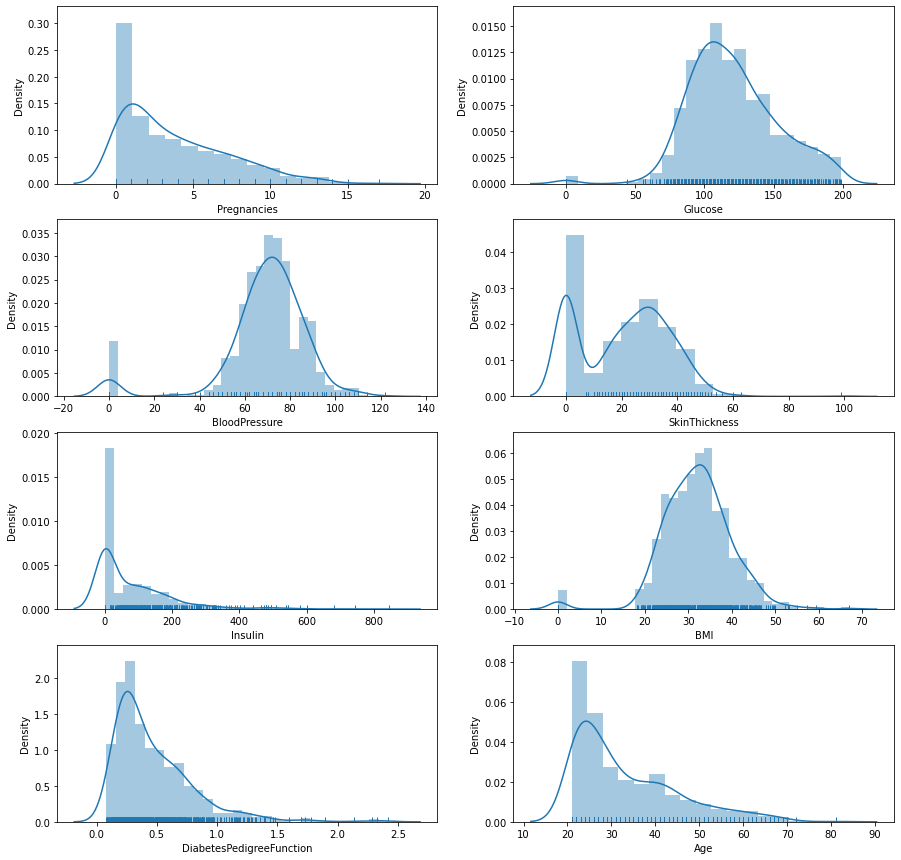

In [17]:
#distribution of variables
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['Outcome'],axis=1),ax.flatten()):
    sns.distplot(df_dataset[column],rug=True,ax=subplot)

In [18]:
#from the above plot,we can see that many of the features having zero value which can never happens in a real life scenario.

In [19]:
#Out these features['Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'],a value of zero 
#does not make sense and thus indicates missing value.Now we can calculate the missing value 
#percentage in each of these columns so as to decide how to treat these values.

In [20]:
missing_value_columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [21]:
for column in missing_value_columns:
    print("No. of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0])
    print("Percentage of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0]/len(df_dataset)*100)
    print("***************************")

No. of zeros in Glucose is 5
Percentage of zeros in Glucose is 0.6510416666666667
***************************
No. of zeros in BloodPressure is 35
Percentage of zeros in BloodPressure is 4.557291666666666
***************************
No. of zeros in SkinThickness is 227
Percentage of zeros in SkinThickness is 29.557291666666668
***************************
No. of zeros in Insulin is 374
Percentage of zeros in Insulin is 48.69791666666667
***************************
No. of zeros in BMI is 11
Percentage of zeros in BMI is 1.4322916666666665
***************************


In [22]:
#percentage of zeros in features like Insulin and Skin Thickness is above 20% so dropping these rows will reduce 
#the size of dataset.So it is better to replace those zeros with the mean values.

In [23]:
for column in missing_value_columns:
    df_dataset[column]=df_dataset[column].apply(lambda x:df_dataset[column].mean() if x==0 else x)

In [24]:
for column in missing_value_columns:
    print("No. of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0])
    print("Percentage of zeros in",column,"is",df_dataset[df_dataset[column]==0].shape[0]/len(df_dataset)*100)
    print("***************************")

No. of zeros in Glucose is 0
Percentage of zeros in Glucose is 0.0
***************************
No. of zeros in BloodPressure is 0
Percentage of zeros in BloodPressure is 0.0
***************************
No. of zeros in SkinThickness is 0
Percentage of zeros in SkinThickness is 0.0
***************************
No. of zeros in Insulin is 0
Percentage of zeros in Insulin is 0.0
***************************
No. of zeros in BMI is 0
Percentage of zeros in BMI is 0.0
***************************


In [25]:
#Now check for the outliers in the features

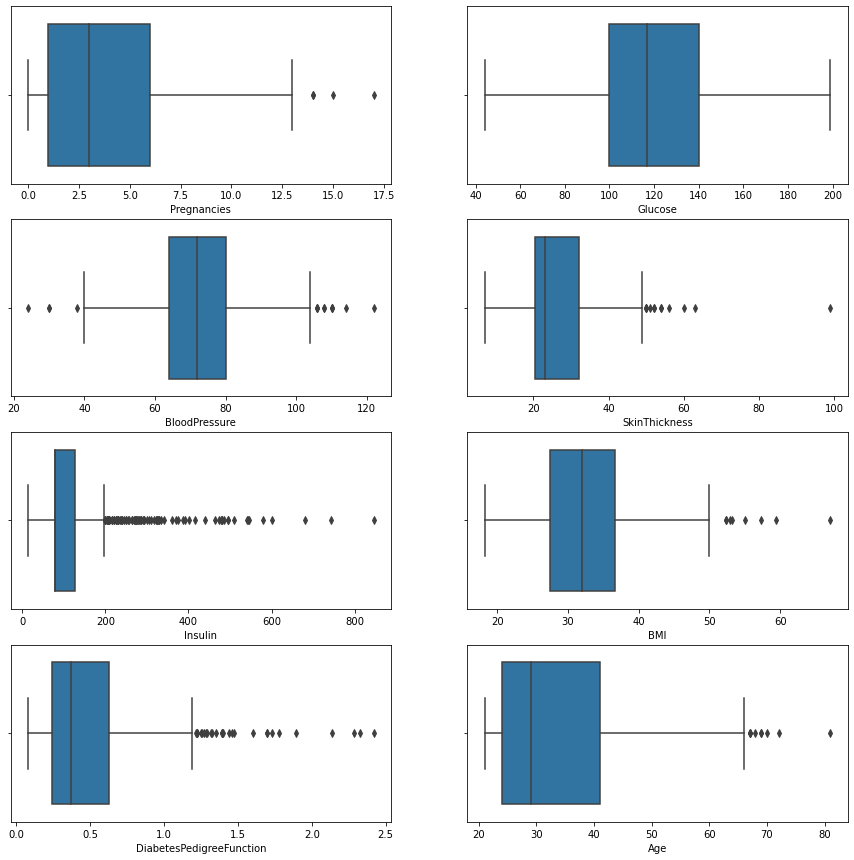

In [26]:
fig,ax=plt.subplots(4,2,figsize=(15,15))
for column,subplot in zip(df_dataset.drop(['Outcome'],axis=1),ax.flatten()):
    sns.boxplot(x=column,data=df_dataset,ax=subplot)

In [27]:
#count of the person with extreme values in each features

In [28]:
df_dataset[df_dataset['BloodPressure']>100].shape

(13, 9)

In [29]:
df_dataset[df_dataset['SkinThickness']>80].shape

(1, 9)

In [30]:
df_dataset[df_dataset['BMI']>50].shape

(8, 9)

In [31]:
df_dataset[df_dataset['Insulin']>200].shape

(85, 9)

In [32]:
#the person with extreme values are sometimes common,so we can leave those etremes as such

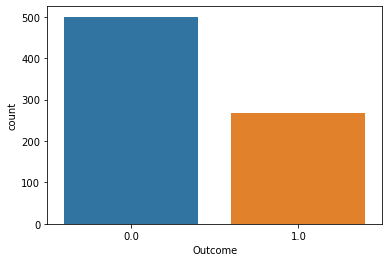

In [33]:
sns.countplot(df_dataset['Outcome']);

In [34]:
print("The output feature 'Outcome' in % :\n")
df_dataset['Outcome'].value_counts()/len(df_dataset)

The output feature 'Outcome' in % :



0.0    0.651042
1.0    0.348958
Name: Outcome, dtype: float64

In [35]:
#The output feature 'Outcome' is somewhat balanced

In [36]:
#check the correlation between the variables
corr_matrix=df_dataset.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


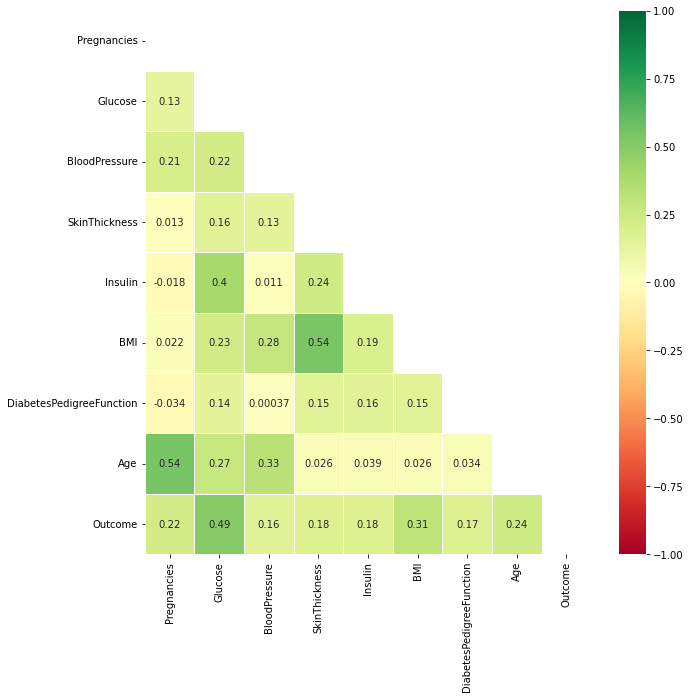

In [37]:
plt.figure(figsize=(10,10))
mask=np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,vmin=-1,vmax=1,annot=True,cmap='RdYlGn',mask=mask,linecolor='white',linewidths=0.5)
plt.show()

In [38]:
#The feature 'Glucose' only has a good direct correlation with the 'Outcome'.The other features has 
#only a low or very low correlation with the output feature.
#no multicollinearity so proceed with all the features for training the dataset

##### Training and Testing dataset

In [39]:
features=df_dataset.drop(['Outcome'],axis=1)

In [40]:
target=df_dataset['Outcome']

In [41]:
X_train,X_test,y_train,y_test=train_test_split(features,target,train_size=0.7,random_state=4)

In [42]:
rf_classifier = RandomForestClassifier()

In [43]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = rf_classifier.predict(X_test)

In [45]:
print("TEST RESULTS")
print("---------------")
print("Mean absolute error on test data:",mean_absolute_error(y_pred,y_test))
print("Mean squared error on test data:",mean_squared_error(y_pred,y_test))
print("Root mean squared error on test data:",np.sqrt(mean_squared_error(y_pred,y_test)))
print("The test accuracy for RandomForestClassifier : ",accuracy_score(y_test,y_pred))
print("The confusion_matrix for RandomForestClassifier : \n",confusion_matrix(y_test, y_pred))
print("The classification_report for RandomForestClassifier : \n",classification_report(y_test, y_pred))

TEST RESULTS
---------------
Mean absolute error on test data: 0.21212121212121213
Mean squared error on test data: 0.21212121212121213
Root mean squared error on test data: 0.4605661864718383
The test accuracy for RandomForestClassifier :  0.7878787878787878
The confusion_matrix for RandomForestClassifier : 
 [[125  27]
 [ 22  57]]
The classification_report for RandomForestClassifier : 
               precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       152
         1.0       0.68      0.72      0.70        79

    accuracy                           0.79       231
   macro avg       0.76      0.77      0.77       231
weighted avg       0.79      0.79      0.79       231



#### Data Prediction

In [46]:
np.array(features)[0].reshape(1,-1)

array([[  6.        , 148.        ,  72.        ,  35.        ,
         79.79947917,  33.6       ,   0.627     ,  50.        ]])

In [47]:
rf_classifier.predict(np.array(features)[0].reshape(1,-1))

array([1.])

#### Pickle the model

In [48]:
pickle_model=pickle.load(open('diabetes_model.pkl','rb'))

In [49]:
#dump information to the file where we want to store the data
pickle.dump(rf_classifier,open('diabetes_model.pkl','wb'))

In [50]:
pickle_model.predict(np.array(features)[0].reshape(1,-1))

array([1], dtype=int64)